In [1]:
import pandas as pd

df = pd.read_csv("煤炭.csv")

In [2]:
df.head()

,品种,合约,交割日期,交割量,交割金额
0,焦炭,j2001,20200120,340,"66,487,000"
1,焦炭,j2005,20200522,160,"27,512,000"
2,焦炭,j2009,20200915,30,"7,473,000"
3,焦炭,j2009,20200917,450,"94,590,000"
4,焦炭,j2010,20201027,20,"4,204,000"


In [19]:
data = df['交割日期']
data = list(data)

In [21]:
import datetime as dt



tt = []
for i in data:
    i = str(i)
    a = dt.datetime.strptime(i,'%Y%m%d')
    b = dt.datetime.strftime(a,'%Y-%m-%d')
    tt.append(b)

['2020-01-20',
 '2020-05-22',
 '2020-09-15',
 '2020-09-17',
 '2020-10-27',
 '2020-12-17',
 '2021-01-06',
 '2021-01-07',
 '2021-01-11',
 '2021-01-12',
 '2021-01-14',
 '2021-01-15',
 '2021-01-20',
 '2021-02-03',
 '2021-02-05',
 '2021-02-08',
 '2021-02-19',
 '2021-02-24',
 '2021-03-03',
 '2021-03-11',
 '2021-03-12',
 '2021-03-17',
 '2021-04-08',
 '2021-04-15',
 '2021-05-11',
 '2021-05-12',
 '2021-05-13',
 '2021-05-14',
 '2021-05-17',
 '2021-05-18',
 '2021-05-19',
 '2021-05-20',
 '2021-05-24',
 '2021-06-03',
 '2021-06-18',
 '2021-07-05',
 '2021-08-04',
 '2021-09-03',
 '2021-09-08',
 '2021-09-09',
 '2021-09-13',
 '2021-09-14',
 '2021-09-17',
 '2021-10-12',
 '2021-10-13',
 '2021-10-19',
 '2021-10-26',
 '2021-11-03',
 '2021-11-15',
 '2021-11-17',
 '2021-12-03',
 '2021-12-06',
 '2021-12-17',
 '2022-01-06',
 '2022-01-10',
 '2022-01-13',
 '2022-01-14',
 '2022-01-18',
 '2022-01-20',
 '2022-02-11',
 '2022-03-03',
 '2022-03-17',
 '2022-05-11',
 '2022-05-12',
 '2022-05-17',
 '2022-05-18',
 '2022-05-

In [22]:
df['交割日期'] = tt

In [32]:
df

,品种,合约,交割日期,交割量,交割金额
0,焦炭,j2001,2020-01-20,340,"66,487,000"
1,焦炭,j2005,2020-05-22,160,"27,512,000"
2,焦炭,j2009,2020-09-15,30,"7,473,000"
3,焦炭,j2009,2020-09-17,450,"94,590,000"
4,焦炭,j2010,2020-10-27,20,"4,204,000"
...,...,...,...,...,...
75,焦炭,j2301,2023-01-16,30,"8,529,000"
76,焦炭,j2301,2023-01-17,10,"2,871,500"
77,焦炭,j2301,2023-01-19,630,"181,345,500"
78,焦炭,j2305,2023-05-11,50,"10,750,000"


In [46]:
df['交割金额']

0      66,487,000
1      27,512,000
2       7,473,000
3      94,590,000
4       4,204,000
         ...     
75      8,529,000
76      2,871,500
77    181,345,500
78     10,750,000
79      2,288,000
Name: 交割金额, Length: 80, dtype: object

Text(0.5, 1.0, 'Amount of Delivery')

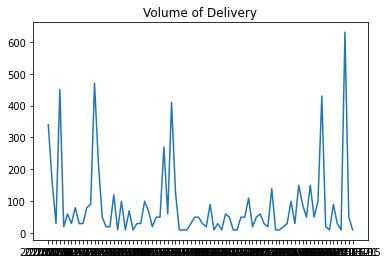

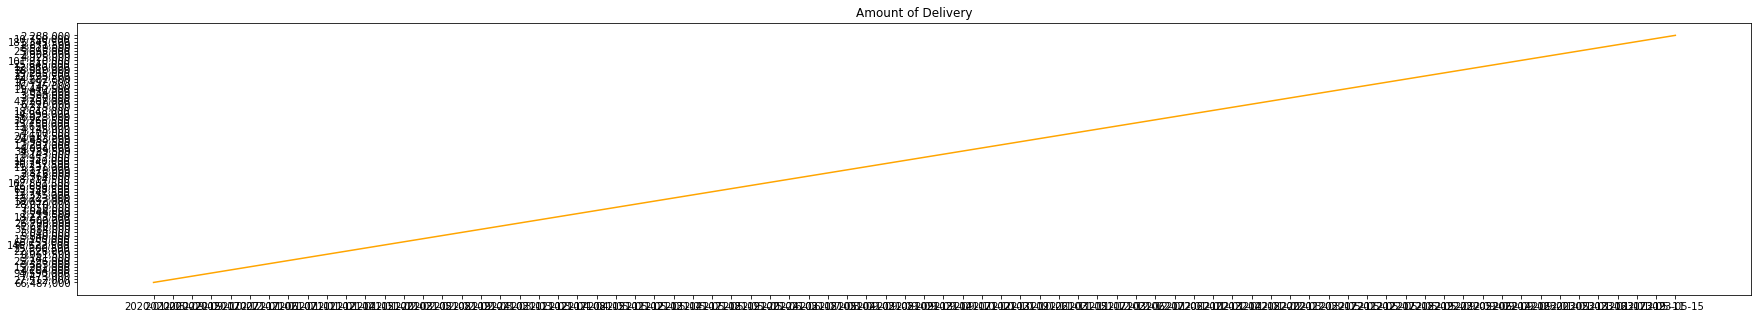

In [45]:
import matplotlib.pyplot as plt

plt.plot(df['交割日期'],df['交割量'])
plt.title("Volume of Delivery")

plt.figure(figsize=(30, 5))
plt.plot(df['交割日期'],df['交割金额'],color = "orange")
plt.title("Amount of Delivery")

In [63]:
kk = []
for i in df['交割金额']:
    i = int(i.replace(',', ''))
    kk.append(i)

In [68]:
import warnings
warnings.filterwarnings("ignore")

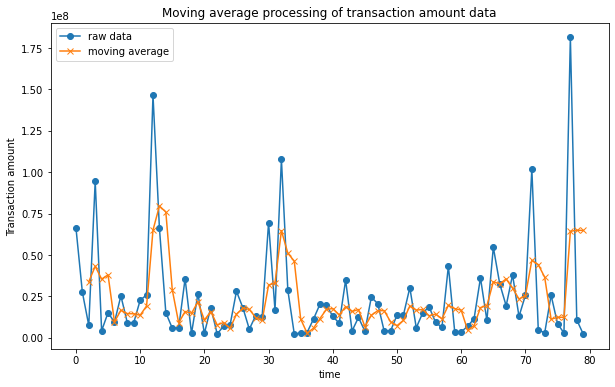

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    """
    计算简单移动平均值
    参数：
        data: 交易金额数据，一个列表或NumPy数组
        window_size: 移动窗口大小，用于计算移动平均值
    返回：
        smoothed_data: 平滑后的数据，一个列表
    """
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    smoothed_data = cumsum[window_size - 1:] / window_size
    return smoothed_data

# 示例数据，你需要用你自己的交易金额数据替换这里的示例数据
transaction_amounts = kk
window_size = 3  # 移动窗口大小，可以根据需求调整

# 计算移动平均值
smoothed_data = moving_average(transaction_amounts, window_size)

# 绘制原始数据和平滑后的数据图表
plt.figure(figsize=(10, 6))
plt.plot(transaction_amounts, label='raw data', marker='o')
plt.plot(range(window_size - 1, len(transaction_amounts)), smoothed_data, label='moving average', marker='x')
plt.xlabel('time')
plt.ylabel('Transaction amount')
plt.legend()
plt.title('Moving average processing of transaction amount data')
plt.show()


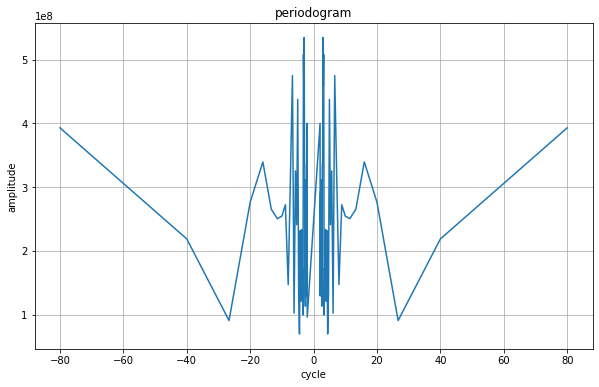

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 示例数据（时间序列数据），这里使用了更长的时间序列，请将其替换为你的实际数据
dates = tt
transaction_amounts = kk
data = pd.Series(transaction_amounts, index=dates)

# 周期图法
data_fft = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data))
periods = 1 / frequencies

# 绘制周期图
plt.figure(figsize=(10, 6))
plt.plot(periods, np.abs(data_fft))
plt.xlabel('cycle')
plt.ylabel('amplitude')
plt.title('periodogram')
plt.grid(True)
plt.show()

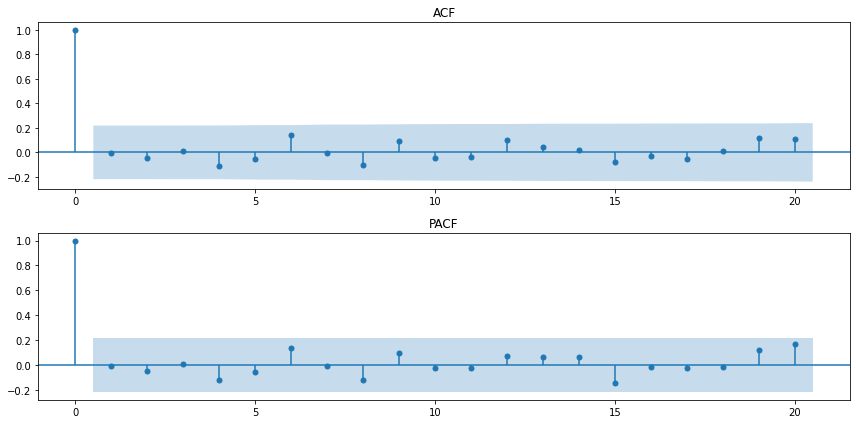

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 示例数据（时间序列数据），这里使用了示例数据，请将其替换为你的实际数据
dates = tt
transaction_amounts = kk
data = pd.Series(transaction_amounts, index=dates)

# 计算ACF和PACF
acf = sm.tsa.acf(data, nlags=20)
pacf = sm.tsa.pacf(data, nlags=20)

# 绘制ACF和PACF图
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(data, lags=20, ax=plt.gca())
plt.title('ACF')

plt.subplot(2, 1, 2)
plot_pacf(data, lags=20, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()

                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                   80
Model:                          AR(1)   Log Likelihood               -1475.421
Method:                          cmle   S.D. of innovations       31242020.708
Date:                Mon, 31 Jul 2023   AIC                             34.590
Time:                        15:33:19   BIC                             34.680
Sample:                             0   HQIC                            34.627
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.342e+07   4.48e+06      5.230      0.000    1.46e+07    3.22e+07
L1.y          -0.0077      0.113     -0.068      0.946      -0.229       0.214
                                    Roots           

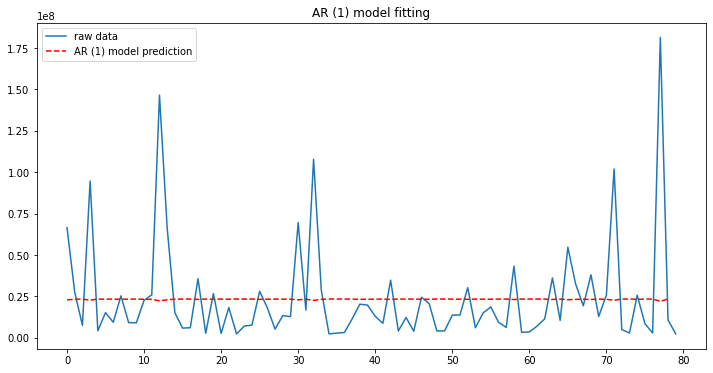

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 示例数据（时间序列数据），这里使用了示例数据，请将其替换为你的实际数据
dates = tt
transaction_amounts = np.random.randint(100, 1000, size=100)
data = kk

# 建立AR(1)模型
ar_model = sm.tsa.AR(data).fit(maxlag=1)

# 打印模型的参数估计结果
print(ar_model.summary())

# 绘制原始数据和AR(1)模型的预测结果
plt.figure(figsize=(12, 6))
plt.plot(data, label='raw data')
plt.plot(ar_model.fittedvalues, label='AR (1) model prediction', color='red', linestyle='dashed')
plt.legend()
plt.title('AR (1) model fitting')
plt.show()